# Cricket Analysis

Now that we are well into the cricket season and another Ashes season is about to get underway, it is maybe time to do some analysis on some cricket data.  The best website for cricket in the World is www.cricinfo.com.  It is quite simply fantastic and you can follow all live scores on there.  They also have a service called statsguru where you can find a lot of statistics.  However, an api for downloading these statistics is not provided and therefore, after a google search, I was able to find some code which I could modify which will parse the website in order to extract some data and write it into a csv file.

The data I have first decided to work with is the batting statistics of all batsmen in Test Matches from 1990 onwards.  The code to do this is in the Cricinfo_Parsing notebook which accompanies this one.  

Now that I have a csv file on disk, I can play with the data.

In [113]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now I want to import the data into a dataframe:

In [114]:
dfmain = pd.read_csv("./Data/test_batsmen.csv")

Now we want to look at the data.

In [115]:
dfmain.head(40)

,Player,Country,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date
0,GR Marsh,(Aus),179,30,125,3,0,24.00,1,Pakistan,Melbourne,12 Jan 1990
1,MA Taylor,(Aus),195,52,144,6,0,36.11,1,Pakistan,Melbourne,12 Jan 1990
2,DC Boon,(Aus),4,0,1,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990
3,AR Border,(Aus),112,24,76,2,0,31.57,1,Pakistan,Melbourne,12 Jan 1990
4,DM Jones,(Aus),1,0,1,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990
5,SR Waugh,(Aus),58,20,35,2,0,57.14,1,Pakistan,Melbourne,12 Jan 1990
6,PR Sleep,(Aus),98,23,74,0,0,31.08,1,Pakistan,Melbourne,12 Jan 1990
7,IA Healy,(Aus),101,48,81,3,0,59.25,1,Pakistan,Melbourne,12 Jan 1990
8,MG Hughes,(Aus),26,8,12,1,0,66.66,1,Pakistan,Melbourne,12 Jan 1990
9,TM Alderman,(Aus),2,0,2,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990


So what this code does is go innings by innings and calculate the statistics.  There are a number of issues which are immediately noticeable.  Firstly, if a batsman is not out in cricket, his score is represented by an asterisk, \*.  If I want to plot anything or calculate anything like mean score, then I have to remove this.  

The other thing is that if a batsman doesn't bat, then a "DNB" is filled in the column and dashes ("-") are put in other columns.  This causes havoc so I need to remove the "DNB"s.  If I look at the dataframe, then I also have to get rid of "TDNB" batsmen and "absent" batsmen.

In [116]:
def DNB(score):
    if score == "DNB" or score == "TDNB" or score == "absent":
        return np.nan
    else:
        return score 
        
dfmain["Runs"] = dfmain["Runs"].apply(DNB)


In [117]:
dfmain.dropna(inplace = True)

In [118]:
dfmain.head(40)

,Player,Country,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date
0,GR Marsh,(Aus),179,30,125,3,0,24.00,1,Pakistan,Melbourne,12 Jan 1990
1,MA Taylor,(Aus),195,52,144,6,0,36.11,1,Pakistan,Melbourne,12 Jan 1990
2,DC Boon,(Aus),4,0,1,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990
3,AR Border,(Aus),112,24,76,2,0,31.57,1,Pakistan,Melbourne,12 Jan 1990
4,DM Jones,(Aus),1,0,1,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990
5,SR Waugh,(Aus),58,20,35,2,0,57.14,1,Pakistan,Melbourne,12 Jan 1990
6,PR Sleep,(Aus),98,23,74,0,0,31.08,1,Pakistan,Melbourne,12 Jan 1990
7,IA Healy,(Aus),101,48,81,3,0,59.25,1,Pakistan,Melbourne,12 Jan 1990
8,MG Hughes,(Aus),26,8,12,1,0,66.66,1,Pakistan,Melbourne,12 Jan 1990
9,TM Alderman,(Aus),2,0,2,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990


Now I have got rid of the DNBs, now I want to take care of the "Not Out's".

In [119]:
def NotOuts(runs):
    match = re.search(r'\w+\*',runs)
    if match:
        return 1
    else:
        return 0
    
dfmain["NotOut"] = dfmain["Runs"].apply(NotOuts)
    
    

In [120]:
dfmain.head()

,Player,Country,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date,NotOut
0,GR Marsh,(Aus),179,30,125,3,0,24.00,1,Pakistan,Melbourne,12 Jan 1990,0
1,MA Taylor,(Aus),195,52,144,6,0,36.11,1,Pakistan,Melbourne,12 Jan 1990,0
2,DC Boon,(Aus),4,0,1,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990,0
3,AR Border,(Aus),112,24,76,2,0,31.57,1,Pakistan,Melbourne,12 Jan 1990,0
4,DM Jones,(Aus),1,0,1,0,0,0.00,1,Pakistan,Melbourne,12 Jan 1990,0


OK, now I want to start plotting some variables and calculating some means.  However, the numbers are not numbers, but rather strings.  We see this here:

In [121]:
print type(dfmain["Minutes"][0])

<type 'str'>


For most of the columns, I want to create some ints but for the strike rate, this needs to be floats.  However, there are still some values which are "-".  I'm not sure what the best way to deal with them is.  This is just some missing information, so I have to return a nan.  I can't put a figure in there, it is just missing information.  I can do this the following way:

In [122]:
def StringToInt(string):
    if string == "-":
        return np.nan
    else:
        return int(re.search(r'\w+',string).group())

def StringToFloat(string):
    if string == "-":
        return np.nan
    else:
        return float(string)

dfmain["Minutes"] = dfmain["Minutes"].apply(StringToInt)
dfmain["Runs"] = dfmain["Runs"].apply(StringToInt)
dfmain["Balls Faced"] = dfmain["Balls Faced"].apply(StringToInt)
dfmain["Fours"] = dfmain["Fours"].apply(StringToInt)
dfmain["Sixes"] = dfmain["Sixes"].apply(StringToInt)
dfmain["Inns"] = dfmain["Inns"].apply(StringToInt)

dfmain["Strike Rate"] = dfmain["Strike Rate"].apply(StringToFloat)

Now that we have things into the format we want, was can calculate some statistics.  Note that pandas ignores NaN values when calculating these things.

In [123]:
dfmain.describe()

,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,NotOut
count,36587.000000,36854.000000,36821.000000,36837.000000,36854.000000,36678.000000,36854.000000,36854.000000
mean,78.901878,27.245048,56.971429,3.267123,0.167852,43.110047,2.253080,0.129755
std,92.521977,35.950855,67.182242,4.564875,0.576394,32.112227,1.037104,0.336039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,17.000000,4.000000,12.000000,0.000000,0.000000,22.640000,1.000000,0.000000
50%,45.000000,14.000000,32.000000,2.000000,0.000000,40.900000,2.000000,0.000000
75%,106.000000,37.000000,77.000000,5.000000,0.000000,58.437500,3.000000,0.000000
max,878.000000,400.000000,642.000000,47.000000,12.000000,600.000000,4.000000,1.000000


So, we can see that in Test Match cricket since 1990, the mean runs scored per batsman is 27.2 with a mean strikerate of 42.75.  That is, on avergae they score 42.75 runs per hundred balls faced.  Now let's look at some high scores:

In [124]:
dfmain[dfmain["Runs"]>300]

,Player,Country,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date,NotOut
589,GA Gooch,(Eng),628,333,485,43,3,68.65,1,India,Lord's,26 Jul 1990,0
4969,BC Lara,(WI),766,375,538,45,0,69.70,1,England,St John's,16 Apr 1994,0
9532,ST Jayasuriya,(SL),799,340,578,36,2,58.82,2,India,Colombo (RPS),2 Aug 1997,0
11567,MA Taylor,(Aus),720,334,564,32,1,59.21,1,Pakistan,Peshawar,15 Oct 1998,1
18533,Inzamam-ul-Haq,(Pak),579,329,436,38,9,75.45,1,New Zealand,Lahore,1 May 2002,0
20896,ML Hayden,(Aus),622,380,437,38,11,86.95,1,Zimbabwe,Perth,9 Oct 2003,0
22227,V Sehwag,(India),531,309,375,39,6,82.40,1,Pakistan,Multan,28 Mar 2004,0
22349,BC Lara,(WI),778,400,582,43,4,68.72,1,England,St John's,10 Apr 2004,1
24547,CH Gayle,(WI),630,317,483,37,3,65.63,2,South Africa,St John's,29 Apr 2005,0
26981,DPMD Jayawardene,(SL),752,374,572,43,1,65.38,2,South Africa,Colombo (SSC),27 Jul 2006,0


In [125]:
dfmain[dfmain["Runs"]>300].describe()

,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,NotOut
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,674.882353,336.294118,493.941176,37.352941,4.176471,69.789412,1.529412,0.235294
std,97.116478,28.624213,78.974261,4.961617,3.395499,12.824965,0.624264,0.437237
min,530.000000,302.000000,304.000000,27.000000,0.000000,54.020000,1.000000,0.000000
25%,609.000000,317.000000,437.000000,34.000000,1.000000,59.210000,1.000000,0.000000
50%,653.000000,329.000000,485.000000,38.000000,4.000000,68.650000,1.000000,0.000000
75%,766.000000,340.000000,564.000000,42.000000,6.000000,75.450000,2.000000,0.000000
max,799.000000,400.000000,582.000000,45.000000,11.000000,104.930000,3.000000,1.000000


Now, the mean strike rate increases up to almost 70 runs per 100 balls.  That is, the more runs you score, the greater your strike rate.  As we say in cricket, the longer you bat for, the more you get your eye in.

Now, let's just plot which country these high score runs are scored against.

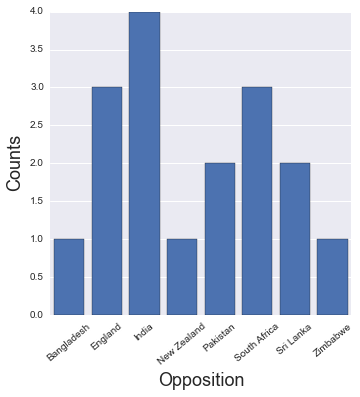

In [126]:
h = sns.factorplot("Opposition",data=dfmain[dfmain["Runs"]>300])
plt.xlabel('Opposition', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

Surprisingly, only 1 each for Bangladesh, New Zealand and Zimbabwe who are the perceived weaker nations playing test cricket.  Maybe not so surprising is the fact that no-one has scored more than 300 runs against Australia!  However, former also don't play as many test matches as other teams, whereas Australia play the most.  This can be seen from the following plot:

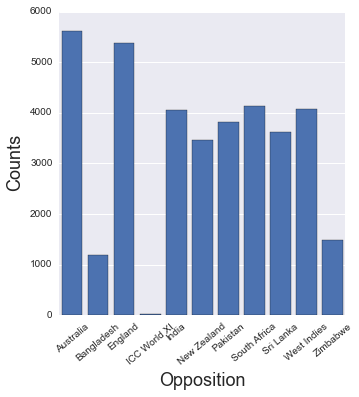

In [127]:
h = sns.factorplot("Opposition",data=dfmain)
plt.xlabel('Opposition', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

We can also look at what country the batsmen came from

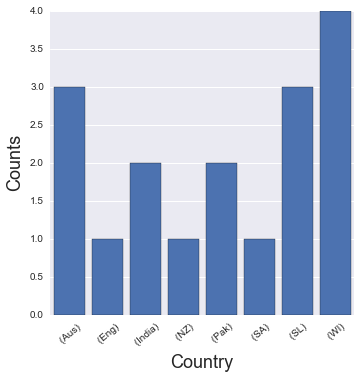

In [128]:
h = sns.factorplot("Country",data=dfmain[dfmain["Runs"]>300])
plt.xlabel('Country', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

## Players runs

To start with, let's look at the England captain Alastair Cook.  I will plot his runs distribution now and it looks fairly typical.

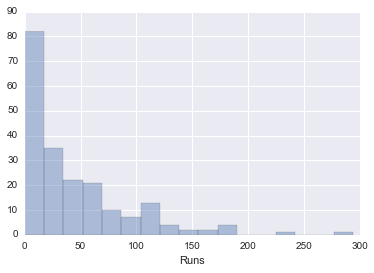

In [129]:
sns.distplot(dfmain[dfmain["Player"]=="AN Cook"]["Runs"],kde=False)

Now, I just want to plot what his run distribution is like vs Australia

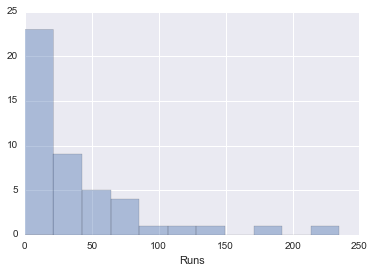

In [130]:
sns.distplot(dfmain[dfmain["Player"] == "AN Cook"][dfmain["Opposition"] == "Australia"]["Runs"],kde=False)

So, he does fairly well against Australia, let's have a look at his statistics.  Firstly, his geenral statistics against all countries.

In [131]:
dfmain[dfmain["Player"] == "AN Cook"].mean()

Minutes        133.303922
Runs            44.117647
Balls Faced     95.063725
Fours            5.063725
Sixes            0.049020
Strike Rate     45.910882
Inns             2.333333
NotOut           0.058824
dtype: float64

In [132]:
dfmain[dfmain["Player"] == "AN Cook"][dfmain["Opposition"] == "Australia"].mean()

Minutes        119.456522
Runs            38.847826
Balls Faced     82.782609
Fours            4.304348
Sixes            0.021739
Strike Rate     46.105652
Inns             2.391304
NotOut           0.021739
dtype: float64

So, the mean number of runs scored is not his average, because I haven't taken into account his not outs, but even still, we can get a fairy good idea of his scores.  As he is an opening batsman, the not outs will probably not affect these statistics as much as maybe a middle order player.

It is possible to place more cuts to see things, such as the following one which only looks at his innings at Lord's versus Australia...

In [133]:
dfmain[dfmain["Player"] == "AN Cook"][dfmain["Opposition"] == "Australia"][dfmain["Ground"] == "Lord's"].mean()

Minutes        76.7500
Runs           36.7500
Balls Faced    57.7500
Fours           6.5000
Sixes           0.0000
Strike Rate    63.7725
Inns            2.0000
NotOut          0.0000
dtype: float64